## Practice notebook for univariate analysis using NHANES data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

### Question 1

Relabel the marital status variable DMDMARTL to have brief but informative character labels. Then construct a frequency table of these values for all people, then for women only, and for men only. Then construct these three frequency tables using only people whose age is between 30 and 40.

In [2]:
# Relabel the marital status variable DMDMARTL
da["DMDMARTLx"] = da.DMDMARTL.replace({1:"Married", 2:"Widowed", 3:"Divorced", 4:"Seperated", 5:"Never Married",
                                      6:"Living with partner", 7:"Refused", 8:"Don't know"}).fillna("Missing")
                                       
da.DMDMARTLx.value_counts()

Married                2780
Never Married          1004
Divorced                579
Living with partner     527
Widowed                 396
Missing                 261
Seperated               186
77.0                      2
Name: DMDMARTLx, dtype: int64

In [3]:
# Relabel the gender variable RIAGENDR
da["RIAGENDRx"] = da.RIAGENDR.replace({1:"Male", 2:"Female"})
da.RIAGENDRx.value_counts()

Female    2976
Male      2759
Name: RIAGENDRx, dtype: int64

In [4]:
# construct a frequency table of these values for all people
x = da.DMDMARTLx.value_counts()
freq = x / x.sum()
print(freq)

Married                0.484743
Never Married          0.175065
Divorced               0.100959
Living with partner    0.091892
Widowed                0.069050
Missing                0.045510
Seperated              0.032432
77.0                   0.000349
Name: DMDMARTLx, dtype: float64


In [5]:
# construct a frequency table for males
x = da[da["RIAGENDRx"] == "Male"].DMDMARTLx.value_counts()
y = da[da["RIAGENDRx"] == "Male"].DMDMARTLx.value_counts().sum()
freq = x / y
print(freq)

Married                0.535339
Never Married          0.175426
Living with partner    0.096049
Divorced               0.083001
Missing                0.048931
Widowed                0.036245
Seperated              0.024647
77.0                   0.000362
Name: DMDMARTLx, dtype: float64


In [6]:
# construct a frequency table for females
x = da[da["RIAGENDRx"] == "Female"].DMDMARTLx.value_counts()
y = da[da["RIAGENDRx"] == "Female"].DMDMARTLx.value_counts().sum()
freq = x/y
print(freq)

Married                0.437836
Never Married          0.174731
Divorced               0.117608
Widowed                0.099462
Living with partner    0.088038
Missing                0.042339
Seperated              0.039651
77.0                   0.000336
Name: DMDMARTLx, dtype: float64


In [7]:
# the distribution of marital status states for men between the overall population
x = da[da["RIAGENDRx"] == "Male"].DMDMARTLx.value_counts()
y = da.DMDMARTLx.value_counts().sum()
freq = x/y
print(freq)

Married                0.257541
Never Married          0.084394
Living with partner    0.046207
Divorced               0.039930
Missing                0.023540
Widowed                0.017437
Seperated              0.011857
77.0                   0.000174
Name: DMDMARTLx, dtype: float64


In [8]:
#between the distribution of marital status states for men between the ages of 30 and 40
da["agegrp"] = pd.cut(da.RIDAGEYR, [30, 40])
x = da[(da["RIAGENDRx"] == "Male") & (da["agegrp"] == pd.Interval(30, 40))].DMDMARTLx.value_counts()
y = da.DMDMARTLx.value_counts().sum()
freq = x / y
print(freq)

Married                0.044987
Never Married          0.015519
Living with partner    0.012554
Divorced               0.004185
Seperated              0.002092
Widowed                0.000349
77.0                   0.000174
Name: DMDMARTLx, dtype: float64


In [9]:
# between the distribution of marital status states for female between the overall population
x = da[da["RIAGENDRx"] == "Female"].DMDMARTLx.value_counts()
y = da.DMDMARTLx.value_counts().sum()
freq = x / y
print(freq)

Married                0.227201
Never Married          0.090671
Divorced               0.061029
Widowed                0.051613
Living with partner    0.045684
Missing                0.021970
Seperated              0.020575
77.0                   0.000174
Name: DMDMARTLx, dtype: float64


In [10]:
# the distribution of marital status states for women between the ages of 30 and 40
x = da[(da.RIAGENDRx == "Female") & (da.agegrp == pd.Interval(30, 40))].DMDMARTLx.value_counts()
y = da["DMDMARTLx"].value_counts().sum()
freq = x / y
print(freq)

Married                0.044987
Never Married          0.016914
Living with partner    0.009939
Divorced               0.007498
Seperated              0.002964
Widowed                0.000349
Name: DMDMARTLx, dtype: float64


In [11]:
# compare the distribution of marital status between women and men, for people of all ages.
dx = da.groupby("DMDMARTLx").RIAGENDRx
dx = dx.value_counts().unstack()
dx = dx.apply(lambda z: z/z.sum(), axis = 0)
#print(dx.to_string(float_format = "%.4f"))
print(dx)

RIAGENDRx              Female      Male
DMDMARTLx                              
77.0                 0.000336  0.000362
Divorced             0.117608  0.083001
Living with partner  0.088038  0.096049
Married              0.437836  0.535339
Missing              0.042339  0.048931
Never Married        0.174731  0.175426
Seperated            0.039651  0.024647
Widowed              0.099462  0.036245


### Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band. Within each age band, present the distribution in terms of proportions that must sum to 1.

In [22]:
x = da[da.RIAGENDRx == "Female"]
x["agegrpx"] = pd.cut(da.RIDAGEYR, [10, 20, 30, 40, 50, 60, 70, 80])
dx = x.groupby(["agegrpx"]).DMDMARTLx.value_counts().unstack()
dx = dx.apply(lambda y: y / y.sum(), axis = 0)
print(dx.to_string(float_format = "%.4f"))

DMDMARTLx   77.0  Divorced  Living with partner  Married  Missing  Never Married  Seperated  Widowed
agegrpx                                                                                             
(10, 20]     NaN       NaN               0.0305   0.0008   1.0000         0.0577        NaN      NaN
(20, 30]     NaN    0.0314               0.4046   0.1205      NaN         0.4404     0.0932      NaN
(30, 40]     NaN    0.1229               0.2176   0.1980      NaN         0.1865     0.1441   0.0068
(40, 50]     NaN    0.1971               0.1412   0.2210      NaN         0.1212     0.2797   0.0405
(50, 60]  1.0000    0.2371               0.1221   0.1972      NaN         0.0808     0.2288   0.0946
(60, 70]     NaN    0.2429               0.0725   0.1627      NaN         0.0731     0.1864   0.2196
(70, 80]     NaN    0.1686               0.0115   0.0998      NaN         0.0404     0.0678   0.6385


<ipython-input-22-b54275c05086>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["agegrpx"] = pd.cut(da.RIDAGEYR, [10, 20, 30, 40, 50, 60, 70, 80])


Repeat the construction for males.

In [24]:
x = da[da["RIAGENDRx"] == "Male"]
x["agegrpx"] = pd.cut(da.RIDAGEYR, [10, 20, 30, 40, 50, 60, 70, 80])
dx = x.groupby(["agegrpx"])["DMDMARTLx"].value_counts().unstack()
dx = dx.apply(lambda y: y / y.sum(), axis = 0)
print(dx.to_string(float_format = "%.4f"))

DMDMARTLx   77.0  Divorced  Living with partner  Married  Missing  Never Married  Seperated  Widowed
agegrpx                                                                                             
(10, 20]     NaN       NaN               0.0113   0.0007   1.0000         0.0744        NaN      NaN
(20, 30]     NaN    0.0087               0.3472   0.0697      NaN         0.4669     0.1029   0.0200
(30, 40]  1.0000    0.1048               0.2717   0.1747      NaN         0.1839     0.1765   0.0200
(40, 50]     NaN    0.1485               0.1245   0.1909      NaN         0.0806     0.1618   0.0200
(50, 60]     NaN    0.2489               0.1283   0.2004      NaN         0.0971     0.1471   0.1000
(60, 70]     NaN    0.2402               0.0830   0.1970      NaN         0.0785     0.2059   0.1700
(70, 80]     NaN    0.2489               0.0340   0.1666      NaN         0.0186     0.2059   0.6700


<ipython-input-24-401c54c93860>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["agegrpx"] = pd.cut(da.RIDAGEYR, [10, 20, 30, 40, 50, 60, 70, 80])


### Question 3
Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMXHT', ylabel='Density'>

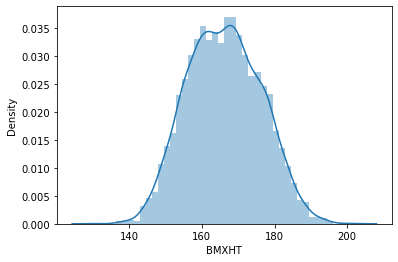

In [25]:
sns.distplot(da.BMXHT.dropna())

Make separate histograms for the heights of `women` and `men`, then make a side-by-side boxplot showing the heights of women and men.

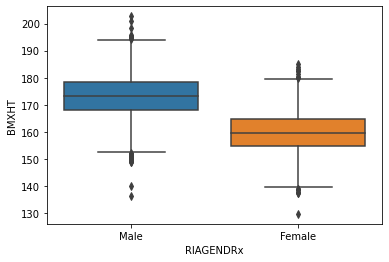

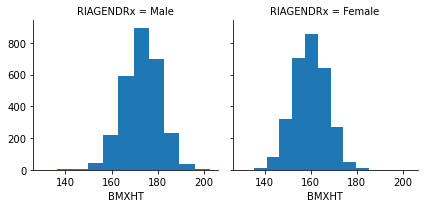

In [26]:
sns.boxplot(x = "RIAGENDRx", y = "BMXHT", data = da)

graph = sns.FacetGrid(da, col = "RIAGENDRx")
graph = graph.map(plt.hist, "BMXHT")
plt.show()

### Question 4
Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents (BPXSY1 and BPXSY2).

Q4a. What proportion of the subjects have a lower SBP on the second reading compared to the first?

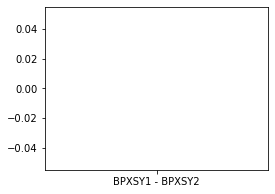

In [27]:
plt.figure(figsize = (4, 3))
plt.boxplot(da["BPXSY1"] - da["BPXSY2"])
plt.xticks((1, ), ("BPXSY1 - BPXSY2", ))

plt.show()

Q4b. Make side-by-side boxplots of the two systolic blood pressure variables.

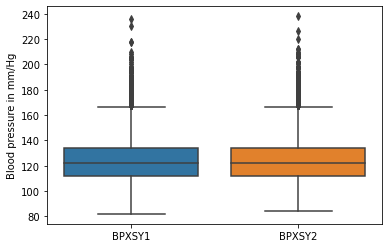

In [28]:
bp = sns.boxplot(data = da.loc[:, ["BPXSY1", "BPXSY2"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

plt.show()

### Question5
Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is DMDEDUC2). Convert the frequencies to proportions.

In [29]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"}).fillna("Missing")
dx = da.groupby(["DMDEDUC2x"]).DMDHHSIZ.value_counts().unstack()
dx = dx.apply(lambda x: x / x.sum(), axis = 1)
print(dx.to_string(float_format = "%.2f"))

DMDHHSIZ           1    2    3    4    5    6    7
DMDEDUC2x                                         
9-11            0.12 0.22 0.16 0.15 0.15 0.11 0.09
<9              0.11 0.22 0.15 0.13 0.15 0.11 0.13
College         0.14 0.35 0.19 0.17 0.10 0.03 0.03
Don't know       NaN 0.67  NaN  NaN 0.33  NaN  NaN
HS/GED          0.15 0.27 0.17 0.16 0.11 0.07 0.07
Missing         0.01 0.08 0.21 0.23 0.19 0.13 0.15
Some college/AA 0.15 0.27 0.19 0.17 0.12 0.05 0.05


Restrict the sample to people between 30 and 40 years of age. Then calculate the median household size for women and men within each level of educational attainment.

In [31]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [30, 40])
da[(da.agegrp == pd.Interval(30, 40))].groupby(["DMDEDUC2x", "RIAGENDR"]).DMDHHSIZ.median()

DMDEDUC2x        RIAGENDR
9-11             1           5
                 2           5
<9               1           5
                 2           5
College          1           3
                 2           4
HS/GED           1           4
                 2           5
Some college/AA  1           4
                 2           4
Name: DMDHHSIZ, dtype: int64

### Question 6
The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables SDMVSTRA and SDMVPSU. Calculate the mean age (RIDAGEYR), height (BMXHT), and BMI (BMXBMI) for each gender (RIAGENDR), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [32]:
da.groupby(["SDMVSTRA", "SDMVPSU", "RIAGENDR"])[["RIDAGEYR", "BMXHT", "BMXBMI"]].mean()

RIDAGEYR       BMXHT     BMXBMI
SDMVSTRA SDMVPSU RIAGENDR                                  
119      1       1         47.861111  172.741667  26.958333
                 2         47.663265  159.570408  30.052041
         2       1         54.363636  172.906818  27.160465
                 2         52.987952  159.244578  27.849398
120      1       1         43.130000  169.537755  30.939175
                 2         43.636364  155.402041  32.419388
         2       1         45.219178  173.075342  27.727397
                 2         43.736111  159.218056  27.400000
121      1       1         46.750000  172.177885  29.416505
                 2         44.397959  158.871579  30.856842
         2       1         42.063158  174.764516  26.273118
                 2         44.376344  160.229032  26.470968
122      1       1         44.653061  173.998969  28.528866
                 2         42.897436  161.315385  29.447436
         2       1         44.320000  170.332323  25.744444
                 2         47.333333  157.231111  26.611111
123      1       1         47.829787  174.315217  29.231522
                 2         44.841121  162.059615  29.905769
         2       1         52.126582  174.454430  28.811392
                 2         46.457447  160.476596  30.641489
124      1       1         50.750000  172.109009  28.614414
                 2         51.664000  158.788710  29.533065
         2       1         48.245614  174.291228  27.714035
                 2         42.541667  162.853521  28.640845
125      1       1         55.165289  173.631092  29.727731
                 2         50.900901  160.762385  30.385321
         2       1         49.705882  174.456863  29.143564
                 2         51.660000  160.021429  28.564286
126      1       1         48.416667  175.149398  29.033333
                 2         46.229167  160.387500  31.262500
         2       1         48.666667  174.713043  29.039130
                 2         47.205882  160.892000  29.612121
127      1       1         53.137931  171.545349  31.062353
                 2         49.694444  157.422430  32.189720
         2       1         54.070588  173.366667  30.557831
                 2         51.486239  159.022936  30.770642
128      1       1         53.673267  169.325000  31.749000
                 2         55.638462  156.339062  32.303125
         2       1         45.822785  172.400000  26.835443
                 2         45.589744  160.437179  27.491026
129      1       1         43.922222  171.094318  26.493182
                 2         45.329787  156.900000  29.019149
         2       1         45.775510  173.138298  28.961702
                 2         43.500000  161.034259  29.429630
130      1       1         50.516854  176.974157  30.337079
                 2         47.810526  161.977895  30.700000
         2       1         50.535354  175.061224  29.237755
                 2         50.833333  160.060577  31.490385
131      1       1         53.140187  175.610476  28.259615
                 2         54.893617  161.989362  30.061702
         2       1         46.778846  175.091346  30.077885
                 2         45.000000  161.673810  32.984127
132      1       1         42.380435  172.534066  28.546154
                 2         43.210526  161.508421  29.848421
         2       1         49.038760  172.809524  28.966667
                 2         51.700000  159.138281  30.540625
133      1       1         44.054795  171.509722  27.495833
                 2         45.105882  158.295122  27.959259
         2       1         47.489796  171.179167  27.966667
                 2         47.063158  158.627368  29.000000

In [34]:
(da.groupby(["SDMVSTRA", "SDMVPSU", "RIAGENDR"])[["RIDAGEYR", "BMXHT", "BMXBMI"]].max()
/
da.groupby(["SDMVSTRA", "SDMVPSU", "RIAGENDR"])[["RIDAGEYR", "BMXHT", "BMXBMI"]].min()).unstack()

RIDAGEYR               BMXHT              BMXBMI          
RIAGENDR                 1         2         1         2         1         2
SDMVSTRA SDMVPSU                                                            
119      1        4.444444  4.444444  1.231270  1.221838  2.994413  3.256684
         2        4.000000  4.444444  1.269385  1.267041  2.224390  4.045161
120      1        4.444444  4.444444  1.297715  1.254360  3.042105  3.666667
         2        4.444444  4.444444  1.271065  1.296011  2.875000  2.443182
121      1        4.444444  4.444444  1.252324  1.308458  3.104938  2.538462
         2        4.444444  4.444444  1.296036  1.249319  2.542373  3.349112
122      1        4.444444  4.444444  1.244646  1.232877  3.284916  3.066298
         2        4.444444  4.444444  1.272849  1.214035  1.902703  2.730539
123      1        4.444444  4.444444  1.210127  1.262143  3.039548  2.483333
         2        4.210526  4.444444  1.290116  1.237474  3.275000  2.947917
124      1        4.210526  4.444444  1.214700  1.259393  2.212871  3.656627
         2        4.210526  4.444444  1.204545  1.216480  2.436464  3.530387
125      1        4.444444  4.444444  1.266364  1.230070  3.271605  2.948571
         2        4.444444  4.444444  1.229072  1.248281  2.420765  3.437126
126      1        4.210526  4.210526  1.224347  1.223684  2.769231  3.395210
         2        4.444444  4.444444  1.244715  1.217753  2.355670  3.226994
127      1        4.444444  4.444444  1.219481  1.226573  3.220930  3.195531
         2        4.444444  4.444444  1.223082  1.267626  2.704142  3.184971
128      1        4.444444  4.000000  1.359029  1.277698  2.577114  3.160428
         2        4.444444  4.444444  1.271883  1.223135  2.734940  3.434483
129      1        4.444444  4.444444  1.209941  1.350810  2.124324  2.806630
         2        4.444444  4.444444  1.250484  1.245775  3.039326  3.413408
130      1        4.444444  4.444444  1.224691  1.227972  3.457831  3.261538
         2        4.444444  4.000000  1.255995  1.288210  2.994475  3.875862
131      1        4.210526  4.444444  1.203232  1.220938  3.357616  3.444444
         2        4.444444  4.444444  1.204759  1.203528  2.713568  3.822485
132      1        4.111111  4.210526  1.268568  1.198903  2.432161  3.121212
         2        4.444444  4.444444  1.292895  1.275562  3.512195  4.078788
133      1        4.444444  4.444444  1.265293  1.273934  2.502762  2.969512
         2        4.444444  4.444444  1.372161  1.202364  3.222222  3.706897

Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU. Report the ratio between the largest and smalles IQR across the MVUs.

In [35]:
da.groupby(["SDMVSTRA", "SDMVPSU", "RIAGENDR"])[["RIDAGEYR", "BMXHT", "BMXBMI"]].quantile(0.75)

RIDAGEYR    BMXHT  BMXBMI
SDMVSTRA SDMVPSU RIAGENDR                           
119      1       1            62.25  177.825  28.500
                 2            62.75  163.900  33.675
         2       1            69.00  178.225  29.400
                 2            69.00  164.300  31.850
120      1       1            55.50  175.800  35.100
                 2            57.00  159.800  36.900
         2       1            59.00  178.900  30.600
                 2            54.25  164.400  30.850
121      1       1            63.00  177.700  33.000
                 2            57.50  163.650  34.600
         2       1            53.50  179.300  28.100
                 2            56.00  164.800  29.600
122      1       1            58.75  178.600  31.500
                 2            55.00  166.925  33.575
         2       1            58.00  175.200  27.600
                 2            60.00  161.075  30.900
123      1       1            61.00  179.025  32.625
                 2            60.00  167.200  34.425
         2       1            67.00  178.400  32.750
                 2            62.75  165.800  34.775
124      1       1            65.00  176.700  31.350
                 2            64.00  163.325  33.250
         2       1            65.00  179.600  31.700
                 2            52.50  167.650  31.600
125      1       1            70.00  178.900  33.500
                 2            65.00  165.400  33.700
         2       1            65.75  178.825  33.300
                 2            67.00  165.200  33.650
126      1       1            66.25  180.700  32.700
                 2            61.00  164.500  36.400
         2       1            66.00  179.000  31.700
                 2            62.75  167.300  34.300
127      1       1            68.00  176.675  34.700
                 2            63.00  160.850  37.650
         2       1            68.00  179.100  33.350
                 2            65.00  164.700  34.500
128      1       1            69.00  174.450  34.450
                 2            70.00  160.725  35.975
         2       1            57.00  177.250  29.350
                 2            55.00  165.625  31.625
129      1       1            53.75  177.400  29.125
                 2            57.00  162.600  33.050
         2       1            60.00  178.400  31.300
                 2            56.25  165.625  33.000
130      1       1            69.00  182.100  33.100
                 2            65.00  166.850  35.800
         2       1            64.50  179.300  32.700
                 2            65.25  165.725  34.700
131      1       1            72.50  180.400  31.825
                 2            77.00  167.175  35.300
         2       1            60.00  178.725  33.425
                 2            55.00  165.475  37.475
132      1       1            52.25  178.200  31.200
                 2            58.00  166.950  34.700
         2       1            69.00  178.475  33.425
                 2            69.00  164.300  35.325
133      1       1            59.00  176.000  30.625
                 2            61.00  162.625  32.100
         2       1            62.25  175.925  29.875
                 2            60.50  163.450  32.850

In [36]:
(da.groupby(["SDMVSTRA", "SDMVPSU", "RIAGENDR"])[["RIDAGEYR", "BMXHT", "BMXBMI"]].quantile(0.75)
-
da.groupby(["SDMVSTRA", "SDMVPSU", "RIAGENDR"])[["RIDAGEYR", "BMXHT", "BMXBMI"]].quantile(0.25)).unstack()

RIDAGEYR          BMXHT         BMXBMI        
RIAGENDR                1      2       1       2      1       2
SDMVSTRA SDMVPSU                                               
119      1          29.75  31.25   9.000   9.325  5.350   9.750
         2          29.00  33.50  11.225   9.950  5.300   9.350
120      1          23.75  26.50  12.125   8.750  9.400   8.775
         2          26.00  25.75  10.500  10.550  7.100   7.750
121      1          34.50  26.25  10.725   9.150  7.500   9.000
         2          25.50  26.00   8.600   9.600  5.700   8.100
122      1          29.50  24.00   9.400  10.400  7.700   9.875
         2          30.00  25.00  10.150   7.575  4.100   8.475
123      1          28.25  30.50   9.350   9.675  8.050  10.450
         2          31.50  34.50   9.900  11.200  8.100   9.975
124      1          32.00  27.00   9.800   8.375  6.100   8.950
         2          31.00  23.50  11.600   8.650  8.700   9.000
125      1          29.00  31.00  10.350   9.100  8.300   8.000
         2          33.50  32.25   7.925  10.675  7.900  10.325
126      1          36.25  30.25  10.450   8.500  8.000  10.675
         2          34.00  31.75   8.125  12.025  6.850  10.350
127      1          30.00  27.25   9.025   7.700  8.200  11.750
         2          28.00  30.00  10.750  11.600  5.950   9.200
128      1          33.00  28.00   9.950   9.125  6.675   8.500
         2          25.50  22.00   9.850  10.650  5.800   9.375
129      1          20.75  24.75  12.300  10.375  6.025   9.500
         2          30.75  26.25  10.700   8.900  5.800   9.725
130      1          36.00  35.50   9.900   8.650  6.700  11.200
         2          28.50  30.25   8.625  10.225  8.375   8.050
131      1          36.00  35.75  10.500  10.025  7.525  11.075
         2          28.00  24.00   7.750   7.575  7.850  10.625
132      1          21.25  30.00  10.600  10.950  6.600  10.700
         2          38.00  33.00  10.550  10.100  9.600  11.750
133      1          33.00  34.00   8.925  10.300  6.425   8.300
         2          32.25  28.50   8.850   9.550  5.900   9.650